In [218]:
import pandas as pd
import dateutil
import numpy as np 
import matplotlib.pyplot as plt

In [176]:
mbta = pd.read_csv('MBTA_Bus_Arrival_Departure_Times_2023/MBTA-Bus-Arrival-Departure-Times_2023-02.csv')

In [177]:
mbta

,service_date,route_id,direction_id,half_trip_id,stop_id,time_point_id,time_point_order,point_type,standard_type,scheduled,actual,scheduled_headway,headway
0,2023-02-01,01,Inbound,58378403.0,110,hhgat,1,Startpoint,Schedule,1900-01-01T05:06:00Z,1900-01-01T05:07:42Z,NaN,NaN
1,2023-02-01,01,Inbound,58378403.0,67,maput,2,Midpoint,Schedule,1900-01-01T05:08:00Z,1900-01-01T05:09:32Z,NaN,NaN
2,2023-02-01,01,Inbound,58378403.0,72,cntsq,3,Midpoint,Schedule,1900-01-01T05:10:00Z,1900-01-01T05:11:54Z,NaN,NaN
3,2023-02-01,01,Inbound,58378403.0,75,mit,4,Midpoint,Schedule,1900-01-01T05:13:00Z,1900-01-01T05:15:10Z,NaN,NaN
4,2023-02-01,01,Inbound,58378403.0,79,hynes,5,Midpoint,Schedule,1900-01-01T05:16:00Z,1900-01-01T05:17:31Z,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123581,2023-02-28,SL5,Outbound,58674769.0,49001,Templ,1,Startpoint,Headway,1900-01-02T01:07:00Z,1900-01-02T01:31:14Z,1200.0,2521.0
2123582,2023-02-28,SL5,Outbound,58674769.0,49002,tumed,2,Midpoint,Headway,1900-01-02T01:11:00Z,1900-01-02T01:36:17Z,1200.0,2627.0
2123583,2023-02-28,SL5,Outbound,58674769.0,5098,Webrk,3,Midpoint,Headway,1900-01-02T01:13:00Z,1900-01-02T01:38:15Z,1200.0,2591.0
2123584,2023-02-28,SL5,Outbound,58674769.0,55,Wasma,4,Midpoint,Headway,1900-01-02T01:16:00Z,1900-01-02T01:41:26Z,1200.0,2614.0


In [178]:
bus1 = mbta.loc[mbta['route_id'] == '01']
bus1_day1 = bus1.loc[bus1['service_date'] == '2023-02-01'].loc[bus1['direction_id'] == "Inbound"]
bus1_day1

,service_date,route_id,direction_id,half_trip_id,stop_id,time_point_id,time_point_order,point_type,standard_type,scheduled,actual,scheduled_headway,headway
0,2023-02-01,01,Inbound,58378403.0,110,hhgat,1,Startpoint,Schedule,1900-01-01T05:06:00Z,1900-01-01T05:07:42Z,NaN,NaN
1,2023-02-01,01,Inbound,58378403.0,67,maput,2,Midpoint,Schedule,1900-01-01T05:08:00Z,1900-01-01T05:09:32Z,NaN,NaN
2,2023-02-01,01,Inbound,58378403.0,72,cntsq,3,Midpoint,Schedule,1900-01-01T05:10:00Z,1900-01-01T05:11:54Z,NaN,NaN
3,2023-02-01,01,Inbound,58378403.0,75,mit,4,Midpoint,Schedule,1900-01-01T05:13:00Z,1900-01-01T05:15:10Z,NaN,NaN
4,2023-02-01,01,Inbound,58378403.0,79,hynes,5,Midpoint,Schedule,1900-01-01T05:16:00Z,1900-01-01T05:17:31Z,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,2023-02-01,01,Inbound,58378469.0,79,hynes,5,Midpoint,Headway,1900-01-02T01:20:00Z,1900-01-02T01:41:23Z,1200.0,2333.0
945,2023-02-01,01,Inbound,58378469.0,187,masta,6,Midpoint,Headway,1900-01-02T01:22:00Z,1900-01-02T01:42:37Z,1200.0,2308.0
946,2023-02-01,01,Inbound,58378469.0,59,Wasma,7,Midpoint,Headway,1900-01-02T01:24:00Z,1900-01-02T01:45:27Z,1200.0,2373.0
947,2023-02-01,01,Inbound,58378469.0,62,Melwa,8,Midpoint,Headway,1900-01-02T01:28:00Z,1900-01-02T01:50:16Z,1200.0,NaN


In [179]:
time_sorted = bus1_day1.sort_values(by=['scheduled'])
time_sorted

,service_date,route_id,direction_id,half_trip_id,stop_id,time_point_id,time_point_order,point_type,standard_type,scheduled,actual,scheduled_headway,headway
0,2023-02-01,01,Inbound,58378403.0,110,hhgat,1,Startpoint,Schedule,1900-01-01T05:06:00Z,1900-01-01T05:07:42Z,NaN,NaN
1,2023-02-01,01,Inbound,58378403.0,67,maput,2,Midpoint,Schedule,1900-01-01T05:08:00Z,1900-01-01T05:09:32Z,NaN,NaN
2,2023-02-01,01,Inbound,58378403.0,72,cntsq,3,Midpoint,Schedule,1900-01-01T05:10:00Z,1900-01-01T05:11:54Z,NaN,NaN
3,2023-02-01,01,Inbound,58378403.0,75,mit,4,Midpoint,Schedule,1900-01-01T05:13:00Z,1900-01-01T05:15:10Z,NaN,NaN
4,2023-02-01,01,Inbound,58378403.0,79,hynes,5,Midpoint,Schedule,1900-01-01T05:16:00Z,1900-01-01T05:17:31Z,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,2023-02-01,01,Inbound,58378469.0,79,hynes,5,Midpoint,Headway,1900-01-02T01:20:00Z,1900-01-02T01:41:23Z,1200.0,2333.0
945,2023-02-01,01,Inbound,58378469.0,187,masta,6,Midpoint,Headway,1900-01-02T01:22:00Z,1900-01-02T01:42:37Z,1200.0,2308.0
946,2023-02-01,01,Inbound,58378469.0,59,Wasma,7,Midpoint,Headway,1900-01-02T01:24:00Z,1900-01-02T01:45:27Z,1200.0,2373.0
947,2023-02-01,01,Inbound,58378469.0,62,Melwa,8,Midpoint,Headway,1900-01-02T01:28:00Z,1900-01-02T01:50:16Z,1200.0,NaN


In [180]:
#convert scheduled to datetime with only the time
time_sorted['scheduled'] = pd.to_datetime(time_sorted['scheduled']).dt.time
time_sorted['actual'] = pd.to_datetime(time_sorted['actual']).dt.time

In [181]:
time_sorted

,service_date,route_id,direction_id,half_trip_id,stop_id,time_point_id,time_point_order,point_type,standard_type,scheduled,actual,scheduled_headway,headway
0,2023-02-01,01,Inbound,58378403.0,110,hhgat,1,Startpoint,Schedule,05:06:00,05:07:42,NaN,NaN
1,2023-02-01,01,Inbound,58378403.0,67,maput,2,Midpoint,Schedule,05:08:00,05:09:32,NaN,NaN
2,2023-02-01,01,Inbound,58378403.0,72,cntsq,3,Midpoint,Schedule,05:10:00,05:11:54,NaN,NaN
3,2023-02-01,01,Inbound,58378403.0,75,mit,4,Midpoint,Schedule,05:13:00,05:15:10,NaN,NaN
4,2023-02-01,01,Inbound,58378403.0,79,hynes,5,Midpoint,Schedule,05:16:00,05:17:31,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,2023-02-01,01,Inbound,58378469.0,79,hynes,5,Midpoint,Headway,01:20:00,01:41:23,1200.0,2333.0
945,2023-02-01,01,Inbound,58378469.0,187,masta,6,Midpoint,Headway,01:22:00,01:42:37,1200.0,2308.0
946,2023-02-01,01,Inbound,58378469.0,59,Wasma,7,Midpoint,Headway,01:24:00,01:45:27,1200.0,2373.0
947,2023-02-01,01,Inbound,58378469.0,62,Melwa,8,Midpoint,Headway,01:28:00,01:50:16,1200.0,NaN


In [182]:
stop1 = time_sorted.loc[time_sorted['time_point_order'] == 1]
stop1

,service_date,route_id,direction_id,half_trip_id,stop_id,time_point_id,time_point_order,point_type,standard_type,scheduled,actual,scheduled_headway,headway
0,2023-02-01,01,Inbound,58378403.0,110,hhgat,1,Startpoint,Schedule,05:06:00,05:07:42,NaN,NaN
6,2023-02-01,01,Inbound,58378495.0,110,hhgat,1,Startpoint,Headway,05:20:00,05:33:55,840.0,1573.0
15,2023-02-01,01,Inbound,58378569.0,110,hhgat,1,Startpoint,Headway,05:34:00,05:34:26,840.0,31.0
24,2023-02-01,01,Inbound,58378603.0,110,hhgat,1,Startpoint,Headway,05:47:00,05:48:01,780.0,815.0
35,2023-02-01,01,Inbound,58378405.0,110,hhgat,1,Startpoint,Headway,06:09:00,06:09:21,1320.0,1280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,2023-02-01,01,Inbound,58378488.0,110,hhgat,1,Startpoint,Headway,00:05:00,00:04:57,900.0,968.0
911,2023-02-01,01,Inbound,58378467.0,110,hhgat,1,Startpoint,Headway,00:20:00,00:34:42,900.0,1785.0
921,2023-02-01,01,Inbound,58378483.0,110,hhgat,1,Startpoint,Headway,00:36:00,00:36:15,960.0,93.0
930,2023-02-01,01,Inbound,58378477.0,110,hhgat,1,Startpoint,Headway,00:52:00,00:52:11,960.0,956.0


In [183]:
trip = stop1.loc[stop1['half_trip_id'] == 58378403.0]
trip

,service_date,route_id,direction_id,half_trip_id,stop_id,time_point_id,time_point_order,point_type,standard_type,scheduled,actual,scheduled_headway,headway
0,2023-02-01,01,Inbound,58378403.0,110,hhgat,1,Startpoint,Schedule,05:06:00,05:07:42,NaN,NaN


In [184]:
#find diffrerence in time in seconds
t1 = pd.to_datetime(trip['scheduled'].astype(str)).dt.time 
t2 = pd.to_datetime(trip['actual'].astype(str)).dt.time
diff = pd.to_datetime(t2.astype(str)) - pd.to_datetime(t1.astype(str))
diff = diff.dt.total_seconds()
diff.iloc[0]

102.0

In [209]:
def create_bus_ts(dataframe):
    output_df = pd.DataFrame(columns=["realtime", "time_difference"])
    tripids = dataframe['half_trip_id'].unique()
    tripids = tripids[~np.isnan(tripids)]
    for j in tripids:
        trip = stop1.loc[stop1['half_trip_id'] == j]
        t1 = pd.to_datetime(trip['scheduled'].astype(str)).dt.time
        t2 = pd.to_datetime(trip['actual'].astype(str)).dt.time
        t3 = pd.to_datetime(trip['service_date'])
        #check if standard_type is Schedule or Headway
        if trip['standard_type'].iloc[0] == "Schedule":
            diff = pd.to_datetime(t2.astype(str)) - pd.to_datetime(t1.astype(str))
            trip["time_difference"] = diff.dt.total_seconds().loc[0]
        else:
            trip["time_difference"] = trip["headway"] - trip["scheduled_headway"]
        trip["realtime"] = t3 + pd.to_timedelta(t2.astype(str))
        trip = trip[["realtime", "time_difference"]]
        output_df = pd.concat([output_df, trip])
    return output_df

In [210]:
stop1_cleaned = create_bus_ts(stop1)

/var/folders/qw/5rcwl4d96zvcq7zxv7fzt3m80000gn/T/ipykernel_26587/340279950.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip["time_difference"] = diff.dt.total_seconds().loc[0]
/var/folders/qw/5rcwl4d96zvcq7zxv7fzt3m80000gn/T/ipykernel_26587/340279950.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip["realtime"] = t3 + pd.to_timedelta(t2.astype(str))
/var/folders/qw/5rcwl4d96zvcq7zxv7fzt3m80000gn/T/ipykernel_26587/340279950.py:18: FutureWarning: The behavior of DataFrame concatenation with e

In [211]:
stop1_cleaned

,realtime,time_difference
0,2023-02-01 05:07:42,102.0
6,2023-02-01 05:33:55,733.0
15,2023-02-01 05:34:26,-809.0
24,2023-02-01 05:48:01,35.0
35,2023-02-01 06:09:21,-40.0
...,...,...
901,2023-02-01 00:04:57,68.0
911,2023-02-01 00:34:42,885.0
921,2023-02-01 00:36:15,-867.0
930,2023-02-01 00:52:11,-4.0


In [216]:
stop1_cleaned["realtime"] = pd.to_datetime(stop1_cleaned["realtime"])
stop1_cleaned

,realtime,time_difference
0,2023-02-01 05:07:42,102.0
6,2023-02-01 05:33:55,733.0
15,2023-02-01 05:34:26,-809.0
24,2023-02-01 05:48:01,35.0
35,2023-02-01 06:09:21,-40.0
...,...,...
901,2023-02-01 00:04:57,68.0
911,2023-02-01 00:34:42,885.0
921,2023-02-01 00:36:15,-867.0
930,2023-02-01 00:52:11,-4.0


<Axes: xlabel='realtime', ylabel='time_difference'>

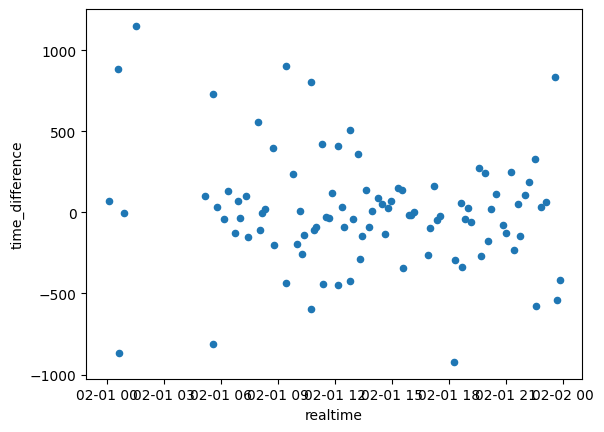

In [224]:
stop1_cleaned.plot(x="realtime", y="time_difference", kind="scatter")

In [222]:
stop1_cleaned.to_csv("stop1_cleaned.csv", index=False)